In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv('bright_automotive_company.csv')
df.head()

Saving bright_automotive_company.csv to bright_automotive_company.csv


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [3]:
df.isnull().sum()


,0
Age,0
Gender,53
Profession,6
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,13


In [4]:
df_filled = df.fillna(df.mean(numeric_only=True))
print("Remaining null values per column:\n", df_filled.isnull().sum())

Remaining null values per column:
 Age                  0
Gender              53
Profession           6
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64


In [5]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


In [6]:
print(df.shape)
df.columns

(1581, 14)


Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1576,False
1577,False
1578,False
1579,False


In [8]:
df.dtypes

,0
Age,int64
Gender,object
Profession,object
Marital_status,object
Education,object
No_of_Dependents,object
Personal_loan,object
House_loan,object
Partner_working,object
Salary,float64


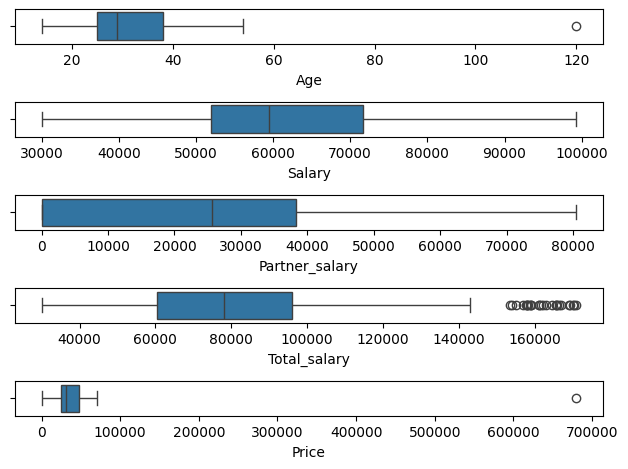

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
num_col = df.select_dtypes(include="number").columns
plt.figsize=(10,8*len(num_col))
for i , col in enumerate(num_col, 1):
  plt.subplot(len(num_col),1,i)
  sns.boxplot(data=df, x=col)
  plt.xlabel(col)
plt.tight_layout()
plt.show()


count    1581.000000
mean       31.952562
std         8.712549
min        14.000000
25%        25.000000
50%        29.000000
75%        38.000000
max       120.000000
Name: Age, dtype: float64
--------------------------------------------------


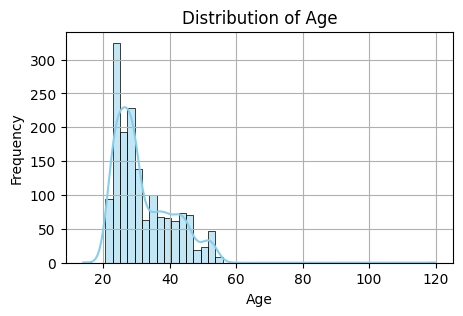

count     1568.000000
mean     60276.913265
std      14636.200199
min      30000.000000
25%      51900.000000
50%      59450.000000
75%      71700.000000
max      99300.000000
Name: Salary, dtype: float64
--------------------------------------------------


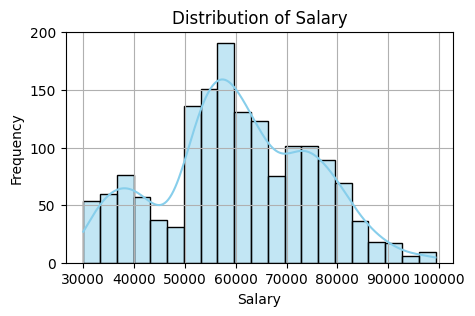

count     1475.000000
mean     20225.559322
std      19573.149277
min          0.000000
25%          0.000000
50%      25600.000000
75%      38300.000000
max      80500.000000
Name: Partner_salary, dtype: float64
--------------------------------------------------


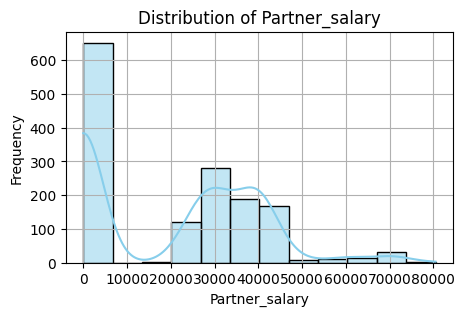

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64
--------------------------------------------------


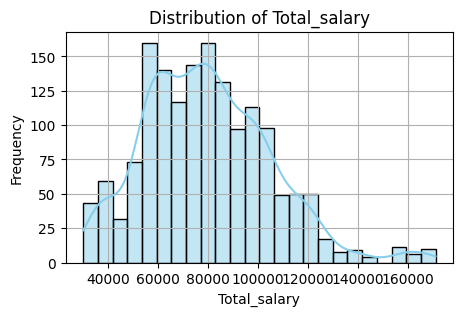

count      1581.000000
mean      35948.170778
std       21175.212108
min          58.000000
25%       25000.000000
50%       31000.000000
75%       47000.000000
max      680000.000000
Name: Price, dtype: float64
--------------------------------------------------


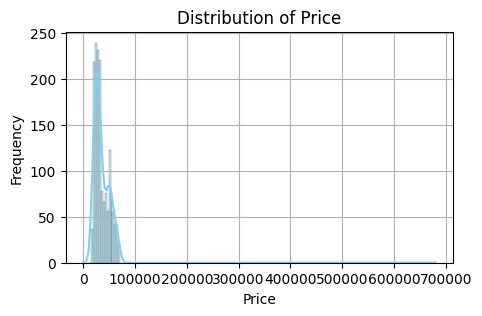

In [10]:
for col in num_col:
  print(df[col].describe())
  print("-"*50)
  plt.figure(figsize=(5, 3))
  sns.histplot(df[col], kde=True, color='skyblue')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64
--------------------------------------------------


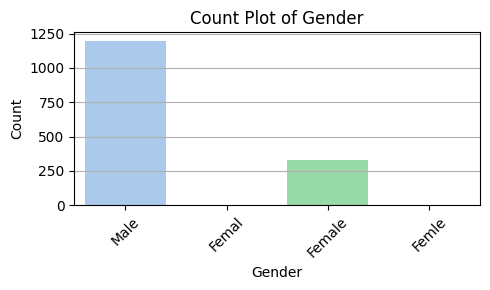

Profession
Salaried    890
Business    685
Name: count, dtype: int64
--------------------------------------------------


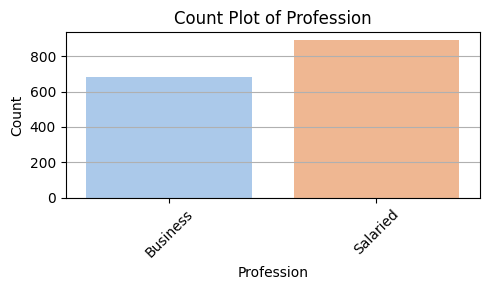

Marital_status
Married    1443
Single      138
Name: count, dtype: int64
--------------------------------------------------


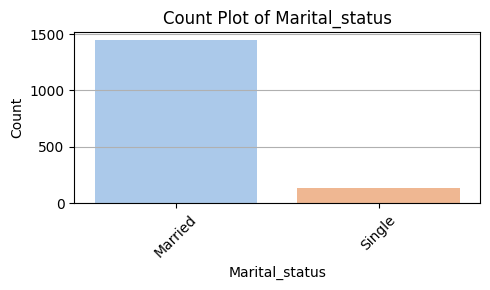

Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64
--------------------------------------------------


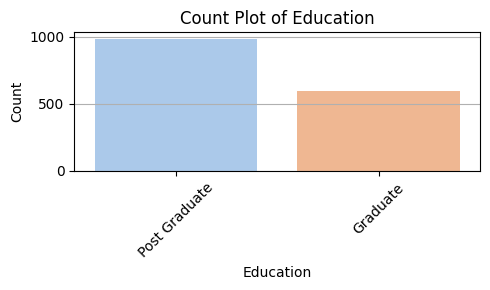

No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64
--------------------------------------------------


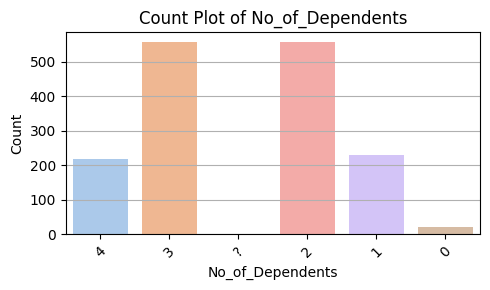

Personal_loan
Yes    792
No     789
Name: count, dtype: int64
--------------------------------------------------


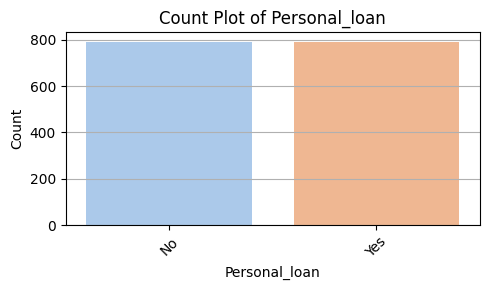

House_loan
No     1054
Yes     527
Name: count, dtype: int64
--------------------------------------------------


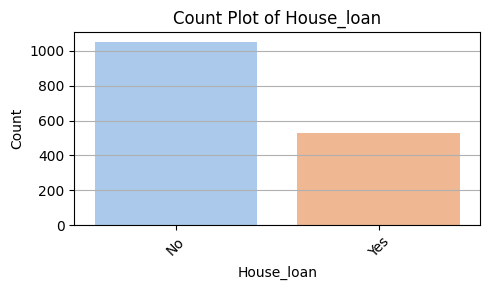

Partner_working
Yes    868
No     713
Name: count, dtype: int64
--------------------------------------------------


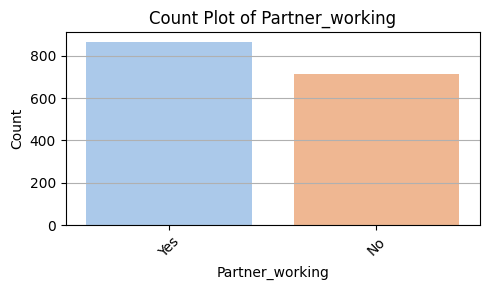

Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64
--------------------------------------------------


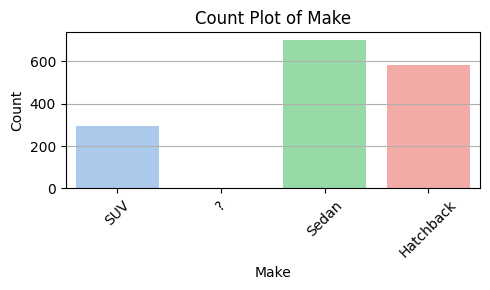

In [11]:
df_categorical = df.select_dtypes(exclude="number").columns
for col in df_categorical:
  print(df[col].value_counts())
  print("-"*50)
  plt.figure(figsize=(5, 3))
  sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False)
  plt.title(f'Count Plot of {col}')
  plt.xticks(rotation=45)
  plt.ylabel('Count')
  plt.grid(True, axis='y')
  plt.tight_layout()
  plt.show()

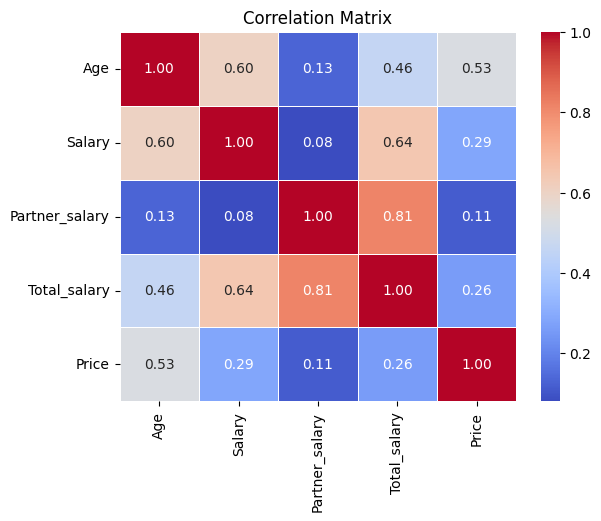

In [12]:
plt.figsize=(6,3)
corr_mat = df[num_col].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

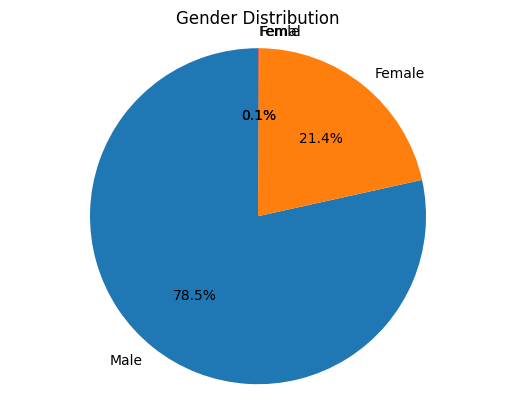

In [13]:
g_count = df['Gender'].value_counts()
plt.figsize=(4,3)
plt.pie(g_count, labels=g_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

In [14]:
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between age and salary: {correlation:.4f}")


Correlation between age and salary: 0.6024


Education
Graduate         48440.709459
Post Graduate    67456.250000
Name: Salary, dtype: float64


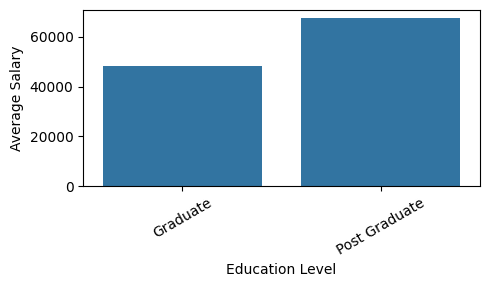

In [15]:
avg_salary = df.groupby("Education")['Salary'].mean()
print(avg_salary)
plt.figure(figsize=(5,3))
sns.barplot(data=avg_salary.reset_index(),x = 'Education', y='Salary')
plt.ylabel('Average Salary')
plt.xlabel('Education Level')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [16]:
per_salary = df.groupby('Education')['Salary'].sum()
a = (per_salary/per_salary.sum())*100
print(a)

Education
Graduate         30.341367
Post Graduate    69.658633
Name: Salary, dtype: float64


Percentage of individual who took personal loan by gender: 
 Gender  Personal_loan
Femal   Yes              100.000000
Female  No                54.740061
        Yes               45.259939
Femle   No               100.000000
Male    Yes               51.626355
        No                48.373645
Name: proportion, dtype: float64


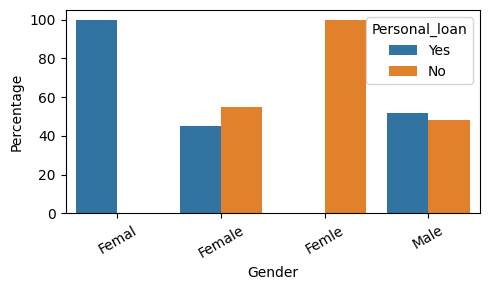

In [17]:
loan_per = df.groupby('Gender')['Personal_loan'].value_counts(normalize=True) * 100
print(f"Percentage of individual who took personal loan by gender: \n",loan_per)
plt.figure(figsize=(5,3))
sns.barplot(x=loan_per.index.get_level_values(0), y=loan_per.values, hue=loan_per.index.get_level_values(1))
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

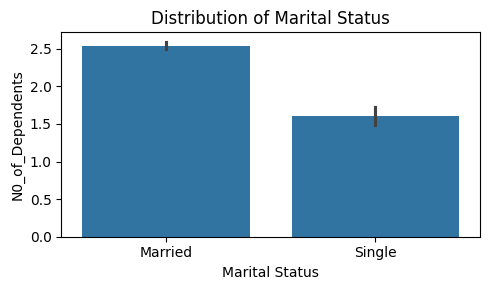

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
df['No_of_Dependents'] = pd.to_numeric(df['No_of_Dependents'], errors='coerce')
sns.barplot(x = 'Marital_status', y = 'No_of_Dependents', data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('N0_of_Dependents')
plt.tight_layout()
plt.show

In [19]:
combined_sal = df.groupby('Partner_working')['Total_salary'].mean()
print(combined_sal)
c_salary = df.groupby('Partner_working')['Total_salary'].sum()
b = (c_salary/c_salary.sum())*100
print(b)

Partner_working
No     60527.208976
Yes    95314.285714
Name: Total_salary, dtype: float64
Partner_working
No     34.280996
Yes    65.719004
Name: Total_salary, dtype: float64


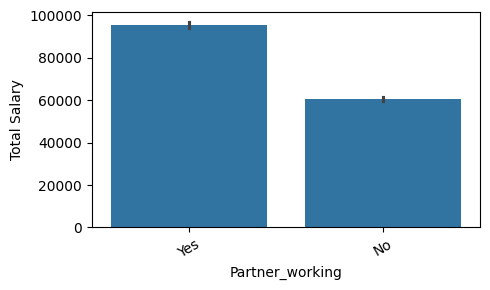

In [20]:
plt.figure(figsize=(5,3))

sns.barplot(data=df,x='Partner_working', y='Total_salary')
plt.ylabel('Total Salary')
plt.xlabel('Partner_working')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

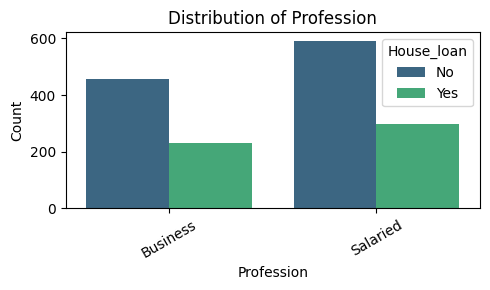

In [21]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='Profession',hue='House_loan',palette='viridis')
plt.title('Distribution of Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

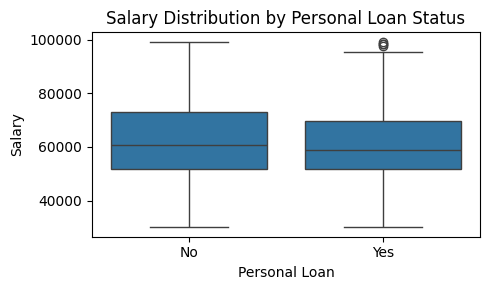

In [22]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='Personal_loan', y='Salary')

plt.title('Salary Distribution by Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import ttest_ind
married = df[df['Marital_status'] == 'Yes']['Personal_loan']
single = df[df['Marital_status'] == 'No']['Personal_loan']
t_stat, p_value = ttest_ind(married, single, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: nan, P-value: nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


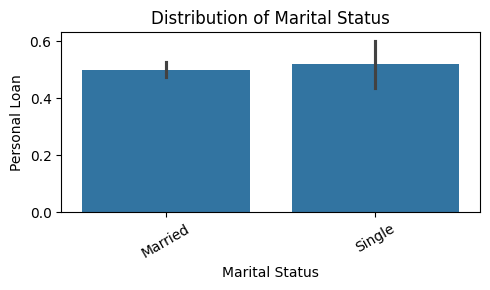

In [24]:
plt.figure(figsize=(5,3))
df['Personal_loan'] = df['Personal_loan'].map({'Yes': 1, 'No': 0})

sns.barplot(data=df,x='Marital_status', y='Personal_loan')
plt.title('Distribution of Marital Status')
plt.ylabel('Personal Loan')
plt.xlabel('Marital Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

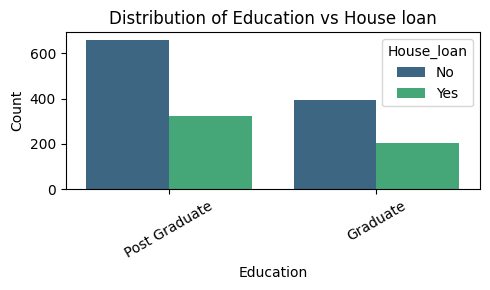

In [25]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='Education',hue='House_loan',palette='viridis')
plt.title('Distribution of Education vs House loan')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

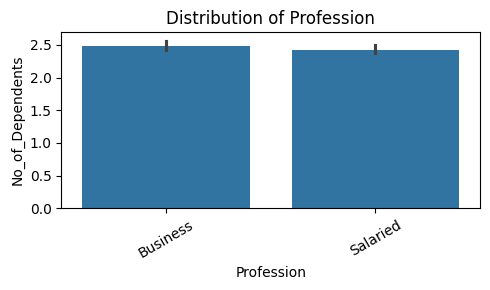

In [26]:
plt.figure(figsize=(5,3))
# Convert 'No_of_Dependents' to numeric, forcing invalid entries to NaN
df['No_of_Dependents'] = pd.to_numeric(df['No_of_Dependents'], errors='coerce')
sns.barplot(data=df,x='Profession', y='No_of_Dependents')
plt.title('Distribution of Profession')
plt.ylabel('No_of_Dependents')
plt.xlabel('Profession')
plt.xticks(rotation=30)
plt.tight_layout()